# Influencer Analysis One4All

In [12]:
# import libraries
import pandas as pd
import networkx as nx
from random import randint as rand
import matplotlib.pyplot as plt
from matplotlib import rcParams, cycler
import seaborn as sns
import plotly.graph_objs as go
%config InlineBackend.figure_format = 'retina'

In [2]:
evergreen = '#00573f'
radiant_green = '#84bd00'
pear = '#c4d600'
sweet_lime = '#ece81a'
artichoke = '#47a23f'
basil = '#00843d'
colors = [evergreen, radiant_green, artichoke, basil, pear]
rcParams['axes.prop_cycle'] = cycler(color=colors)

In [3]:
# read in gml
card_yard = nx.read_gml('../../data/processed/one4all/cardyard.gml')
me_2_you = nx.read_gml('../../data/processed/one4all/fromme2you.gml')
high_street = nx.read_gml('../../data/processed/one4all/highstvouchers.gml')
love_2_shop = nx.read_gml('../../data/processed/one4all/Love2shop_UK.gml')
voucher_exp = nx.read_gml('../../data/processed/one4all/Voucher_Express.gml')
one4all = nx.read_gml('../../data/processed/one4all/One4allGiftUK.gml')

In [4]:
gml_files = [one4all, card_yard, me_2_you, high_street, love_2_shop, voucher_exp]

In [5]:
def network_stats(graph):
    # betweeness centrality
    bc = nx.betweenness_centrality(graph)
    print('Betweeness Centrality: \n')
    print(sorted(bc, key=bc.get, reverse=True)[:10])
    nx.set_node_attributes(graph, name='bc', values=bc)    
    print('\n')

    # degree centrality
    dc = nx.degree_centrality(graph)
    print('Degree Centrality: \n')
    print(sorted(dc, key=dc.get, reverse=True)[:10])
    nx.set_node_attributes(graph, name='dc', values=dc)
    print('\n')
    
    # in degree centrality
    idc = nx.in_degree_centrality(graph)
    print('In Degree Centrality: \n')
    print(sorted(idc, key=idc.get, reverse=True)[:10])
    nx.set_node_attributes(graph, name='idc', values=idc)
    print('\n')
    
    # out degree centrality
    odc = nx.out_degree_centrality(graph)
    print('Out Degree Centrality: \n')
    print(sorted(odc, key=odc.get, reverse=True)[:10])
    nx.set_node_attributes(graph, name='odc', values=odc)
    print('\n')
    
    # page rank
    pr = nx.pagerank(graph)
    print('Page Rank: \n')
    print(sorted(pr, key=pr.get, reverse=True)[:10])
    nx.set_node_attributes(graph, name='pr', values=pr)
    print('\n')
    
    # eigen vector
    edc = nx.eigenvector_centrality(graph)
    print('Eigen Centrality: \n')
    print(sorted(edc, key=edc.get, reverse=True)[:10])
    nx.set_node_attributes(graph, name='edc', values=edc)

    
    return graph

In [6]:
graph_stats_list = []
for i, graph in enumerate(gml_files):
    print(i, '\n')
    graph_stats = network_stats(graph)
    print('\n')
    graph_stats_list.append(graph_stats)

0 

Betweeness Centrality: 

['GraziaUK', 'LivingSocialUK', 'bizzylizzy1921', 'WeAreZizzi', 'RoyalMailStamps', 'feelunique', 'MelanieMse', 'candismagazine', 'BackwellPO', 'GlamourMagUK']


Degree Centrality: 

['marksandspencer', 'feelunique', 'marieclaireuk', 'GraziaUK', 'candismagazine', 'lookfantastic', 'GlamourMagUK', 'AmazonUK', 'WeAreZizzi', 'TheBodyShopUK']


In Degree Centrality: 

['marksandspencer', 'marieclaireuk', 'GraziaUK', 'AmazonUK', 'TheBodyShopUK', 'candismagazine', 'feelunique', 'GlamourMagUK', 'lookfantastic', 'instyle_UK']


Out Degree Centrality: 

['bizzylizzy1921', 'feelunique', 'becky0020', 'WeAreZizzi', 'MelanieMse', 'LivingSocialUK', 'Noahsmummy2017', 'crazydaisyuk', 'LuckyThing13', 'yasminec9']


Page Rank: 

['BritishVogue', 'GraziaUK', 'GlamourMagUK', 'marieclaireuk', 'ELLEUK', 'marksandspencer', 'CosmopolitanUK', 'ELLEmagazine', 'marieclaire', 'hm']


Eigen Centrality: 

['GraziaUK', 'marieclaireuk', 'GlamourMagUK', 'marksandspencer', 'BritishVogue', 'ins

In [7]:
# key actor analysis
# betweeness vs page rank
df_list = []
for graph in gml_files:
    df = pd.DataFrame.from_dict(dict(graph.nodes(data=True)), orient='index')
    df_list.append(df)

In [8]:
for df in df_list:
    df.reset_index(inplace=True)
    df.rename(columns={'index':'handle'}, inplace=True)
    df[['statuses','friends', 'followers', 'listed', 'ffr', 'lfr']] = df[['statuses','friends', 'followers', 'listed', 'ffr', 'lfr']].apply(pd.to_numeric)

In [9]:
df_list[0]

,handle,user_id,file,type,statuses,friends,followers,listed,ffr,lfr,shape,bc,dc,idc,odc,pr,edc
0,CharleneGuy,380298670,One4allGiftUK.dat,friends,19283,3741,4466,65,1.1938,0.1455,triangle-up,0.003696,0.019849,0.002836,0.017013,0.000749,6.522669e-04
1,Beautynailsblog,344126099,One4allGiftUK.dat,friends,2774,128,233,7,1.8203,0.3004,triangle-up,0.000000,0.002836,0.000000,0.002836,0.000188,4.483129e-32
2,Englishian,21215623,One4allGiftUK.dat,friends,119743,973,3399,163,3.4933,0.4796,triangle-up,0.000756,0.045369,0.020794,0.024575,0.001789,4.537733e-02
3,vannilamice,2445834092,One4allGiftUK.dat,friends,36081,278,433,114,1.5576,2.6328,triangle-up,0.000000,0.002836,0.000000,0.002836,0.000188,4.483129e-32
4,BeeRummie,751082826,One4allGiftUK.dat,friends,102549,4998,943,109,0.1887,1.1559,triangle-down,0.000287,0.044423,0.008507,0.035917,0.000298,4.360572e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,WoodStPO,555572007,One4allGiftUK.dat,friends,2889,392,769,12,1.9617,0.1560,triangle-up,0.003900,0.038752,0.022684,0.016068,0.001063,1.346641e-04
1055,alohavic70,95936659,One4allGiftUK.dat,friends,14911,2255,617,22,0.2736,0.3566,triangle-down,0.000357,0.041588,0.004726,0.036862,0.000455,1.006890e-02
1056,garyboat3,1273328857,One4allGiftUK.dat,friends,0,86,19,1,0.2209,0.5263,triangle-down,0.000000,0.000000,0.000000,0.000000,0.000188,4.483129e-32
1057,Franklinsays,58074235,One4allGiftUK.dat,friends,19304,904,3513,39,3.8861,0.1110,triangle-up,0.000698,0.049149,0.024575,0.024575,0.002271,2.627912e-02


In [10]:
df_list[0].describe()

,statuses,friends,followers,listed,ffr,lfr,bc,dc,idc,odc,pr,edc
count,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03
mean,50551.460812,1990.257790,8.046315e+04,387.362606,201.779531,0.536666,0.001256,0.040920,0.020460,0.020460,0.000944,1.202215e-02
std,92552.218629,1696.819846,8.170880e+05,3540.590306,2244.213098,0.622835,0.004630,0.063014,0.057682,0.019104,0.002221,2.829330e-02
min,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000188,4.483129e-32
25%,2554.000000,535.000000,3.320000e+02,9.000000,0.235950,0.138250,0.000000,0.005671,0.000000,0.002836,0.000188,4.483129e-32
50%,13926.000000,1599.000000,9.050000e+02,41.000000,0.611700,0.321000,0.000064,0.025520,0.002836,0.016068,0.000277,1.378986e-03
75%,55215.500000,3103.000000,2.628000e+03,146.000000,1.958050,0.699750,0.000852,0.048204,0.011342,0.035917,0.000690,1.026912e-02
max,732401.000000,6686.000000,1.672586e+07,103332.000000,34812.340400,5.423700,0.079558,0.468809,0.456522,0.112476,0.030177,2.409288e-01


In [42]:
# pr vs betweeness
def plot_actor_analysis(df, plot_title):
    f, ax = plt.subplots(figsize=(15, 15))
    sns.despine(f, left=False, bottom=False)
    sns.scatterplot(data=df,
                    x="bc", y="pr",
                    size="idc",
                    sizes=(1, 500), linewidth=0,
                    ax=ax, legend=False)
#     plt.ylim(-0.001, 0.002)
#     plt.xlim(-0.001, 0.01)
    plt.title('Key Actor Analysis - ' + plot_title, fontsize=20)
    # Set x-axis label
    plt.xlabel('Betweeness Centrality')
    # Set y-axis label
    plt.ylabel('Pagerank')

In [44]:
# pr vs betweeness
def plot_actor_analysis_plotly(df):
    fig = go.Figure(data=go.Scatter(
        x=df.bc, 
        y=df.pr,
        mode='markers',
        text=df[df.idc > 0.02].handle,
         marker=dict(
            size=12,
            color=evergreen, #set color equal to a variable
        )
    ))
    fig.show()

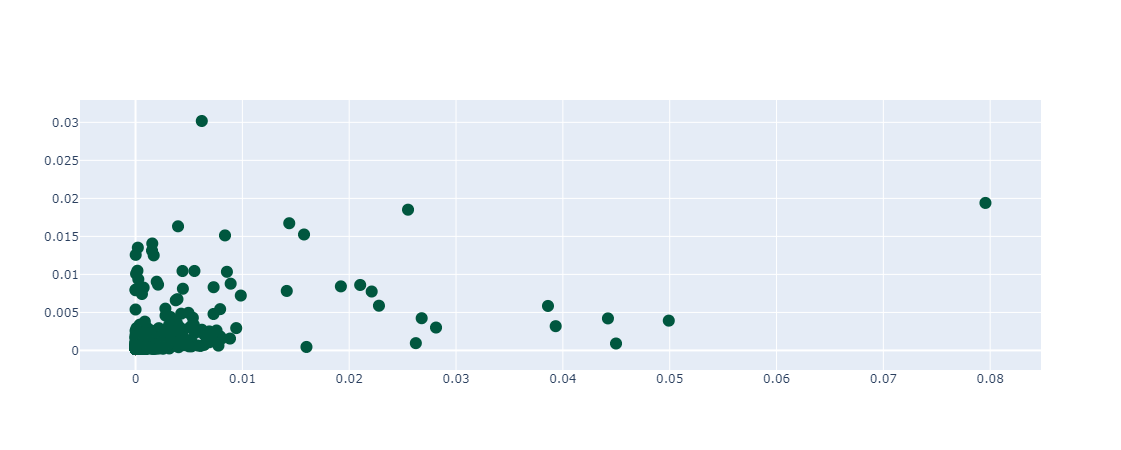

In [45]:
plot_actor_analysis_plotly(df_list[0])

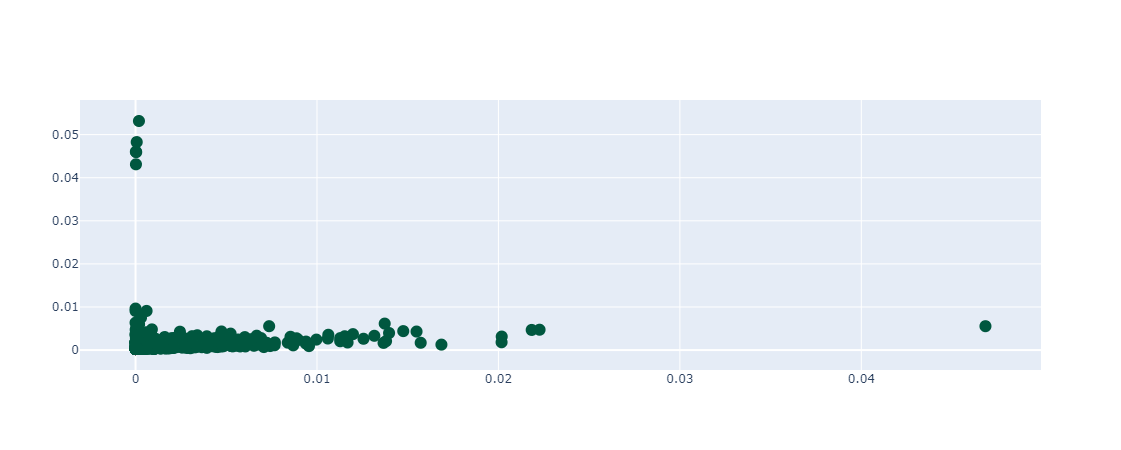

In [46]:
plot_actor_analysis_plotly(df_list[1])

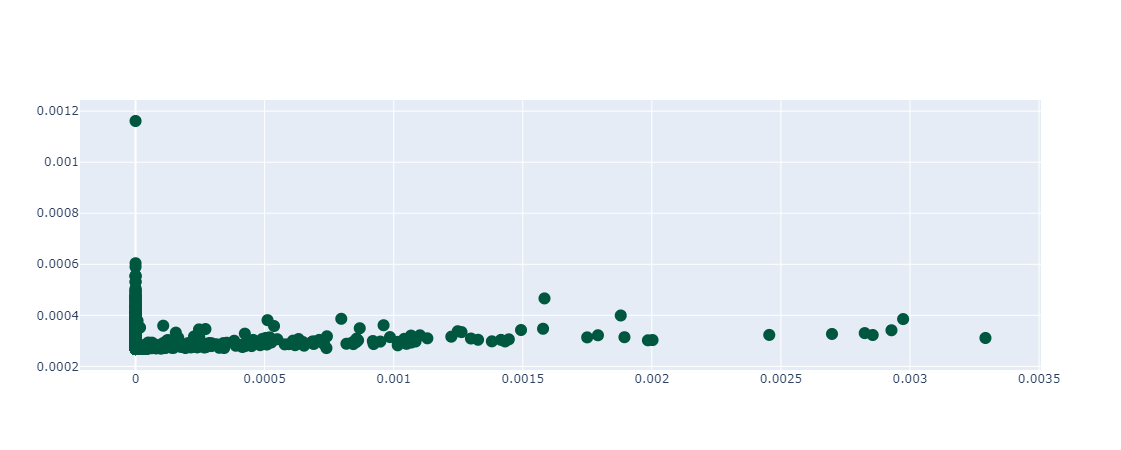

In [47]:
plot_actor_analysis_plotly(df_list[2])

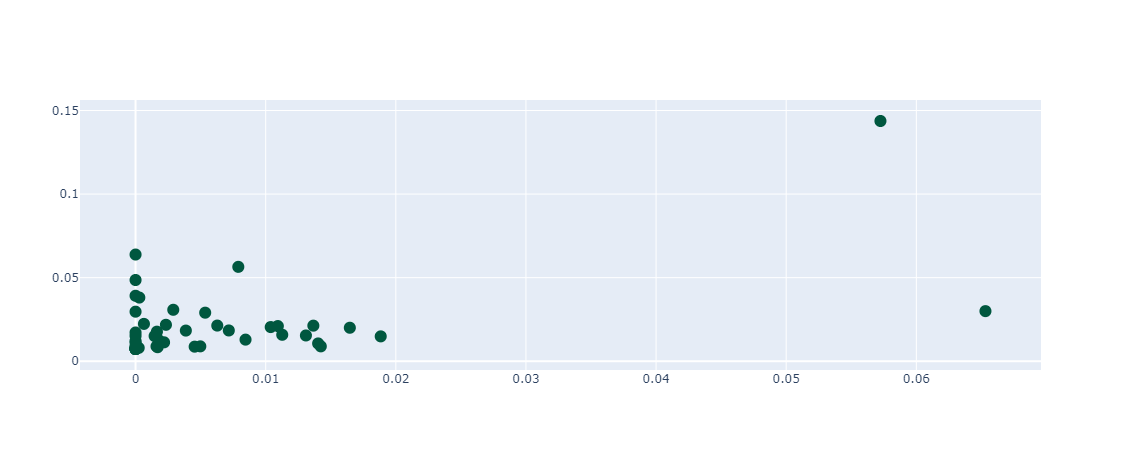

In [48]:
plot_actor_analysis_plotly(df_list[3])

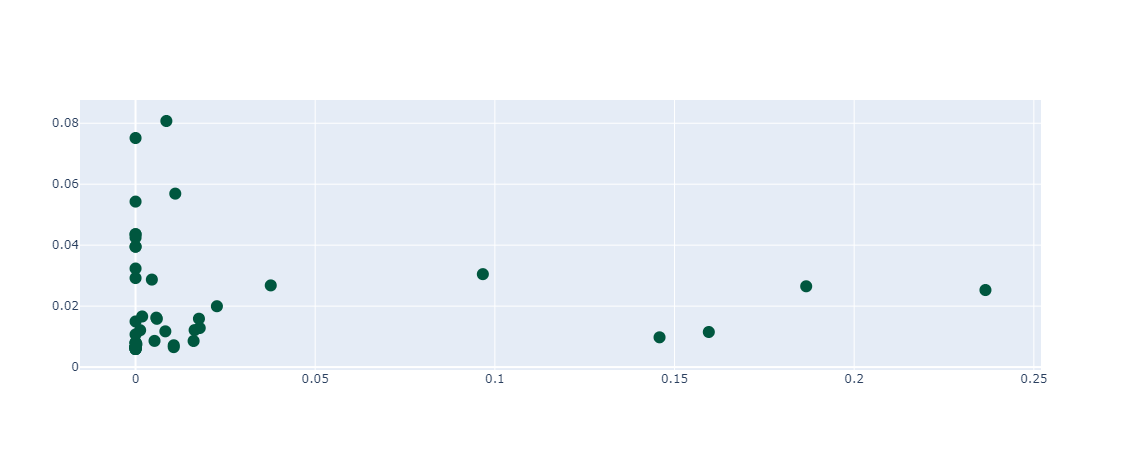

In [50]:
plot_actor_analysis_plotly(df_list[4])

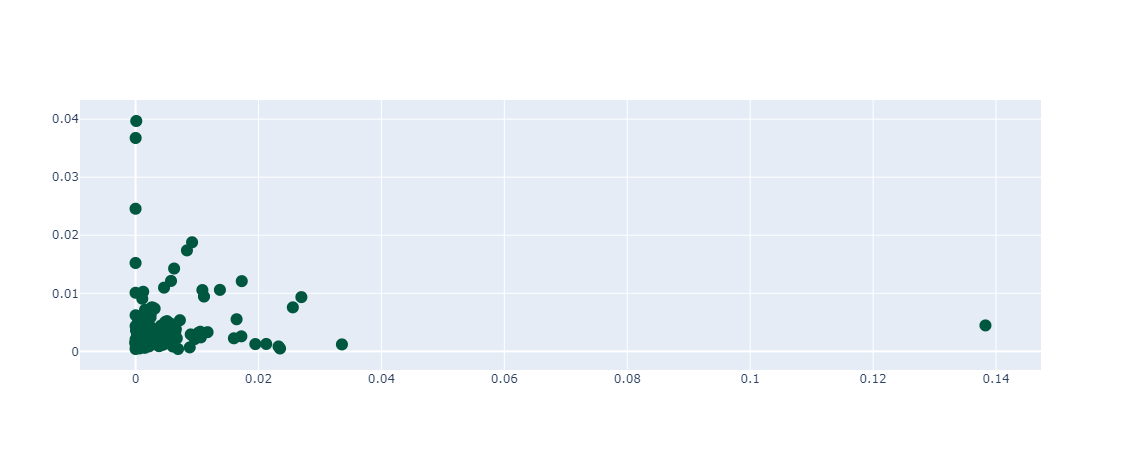

In [29]:
plot_actor_analysis_plotly(df_list[5])

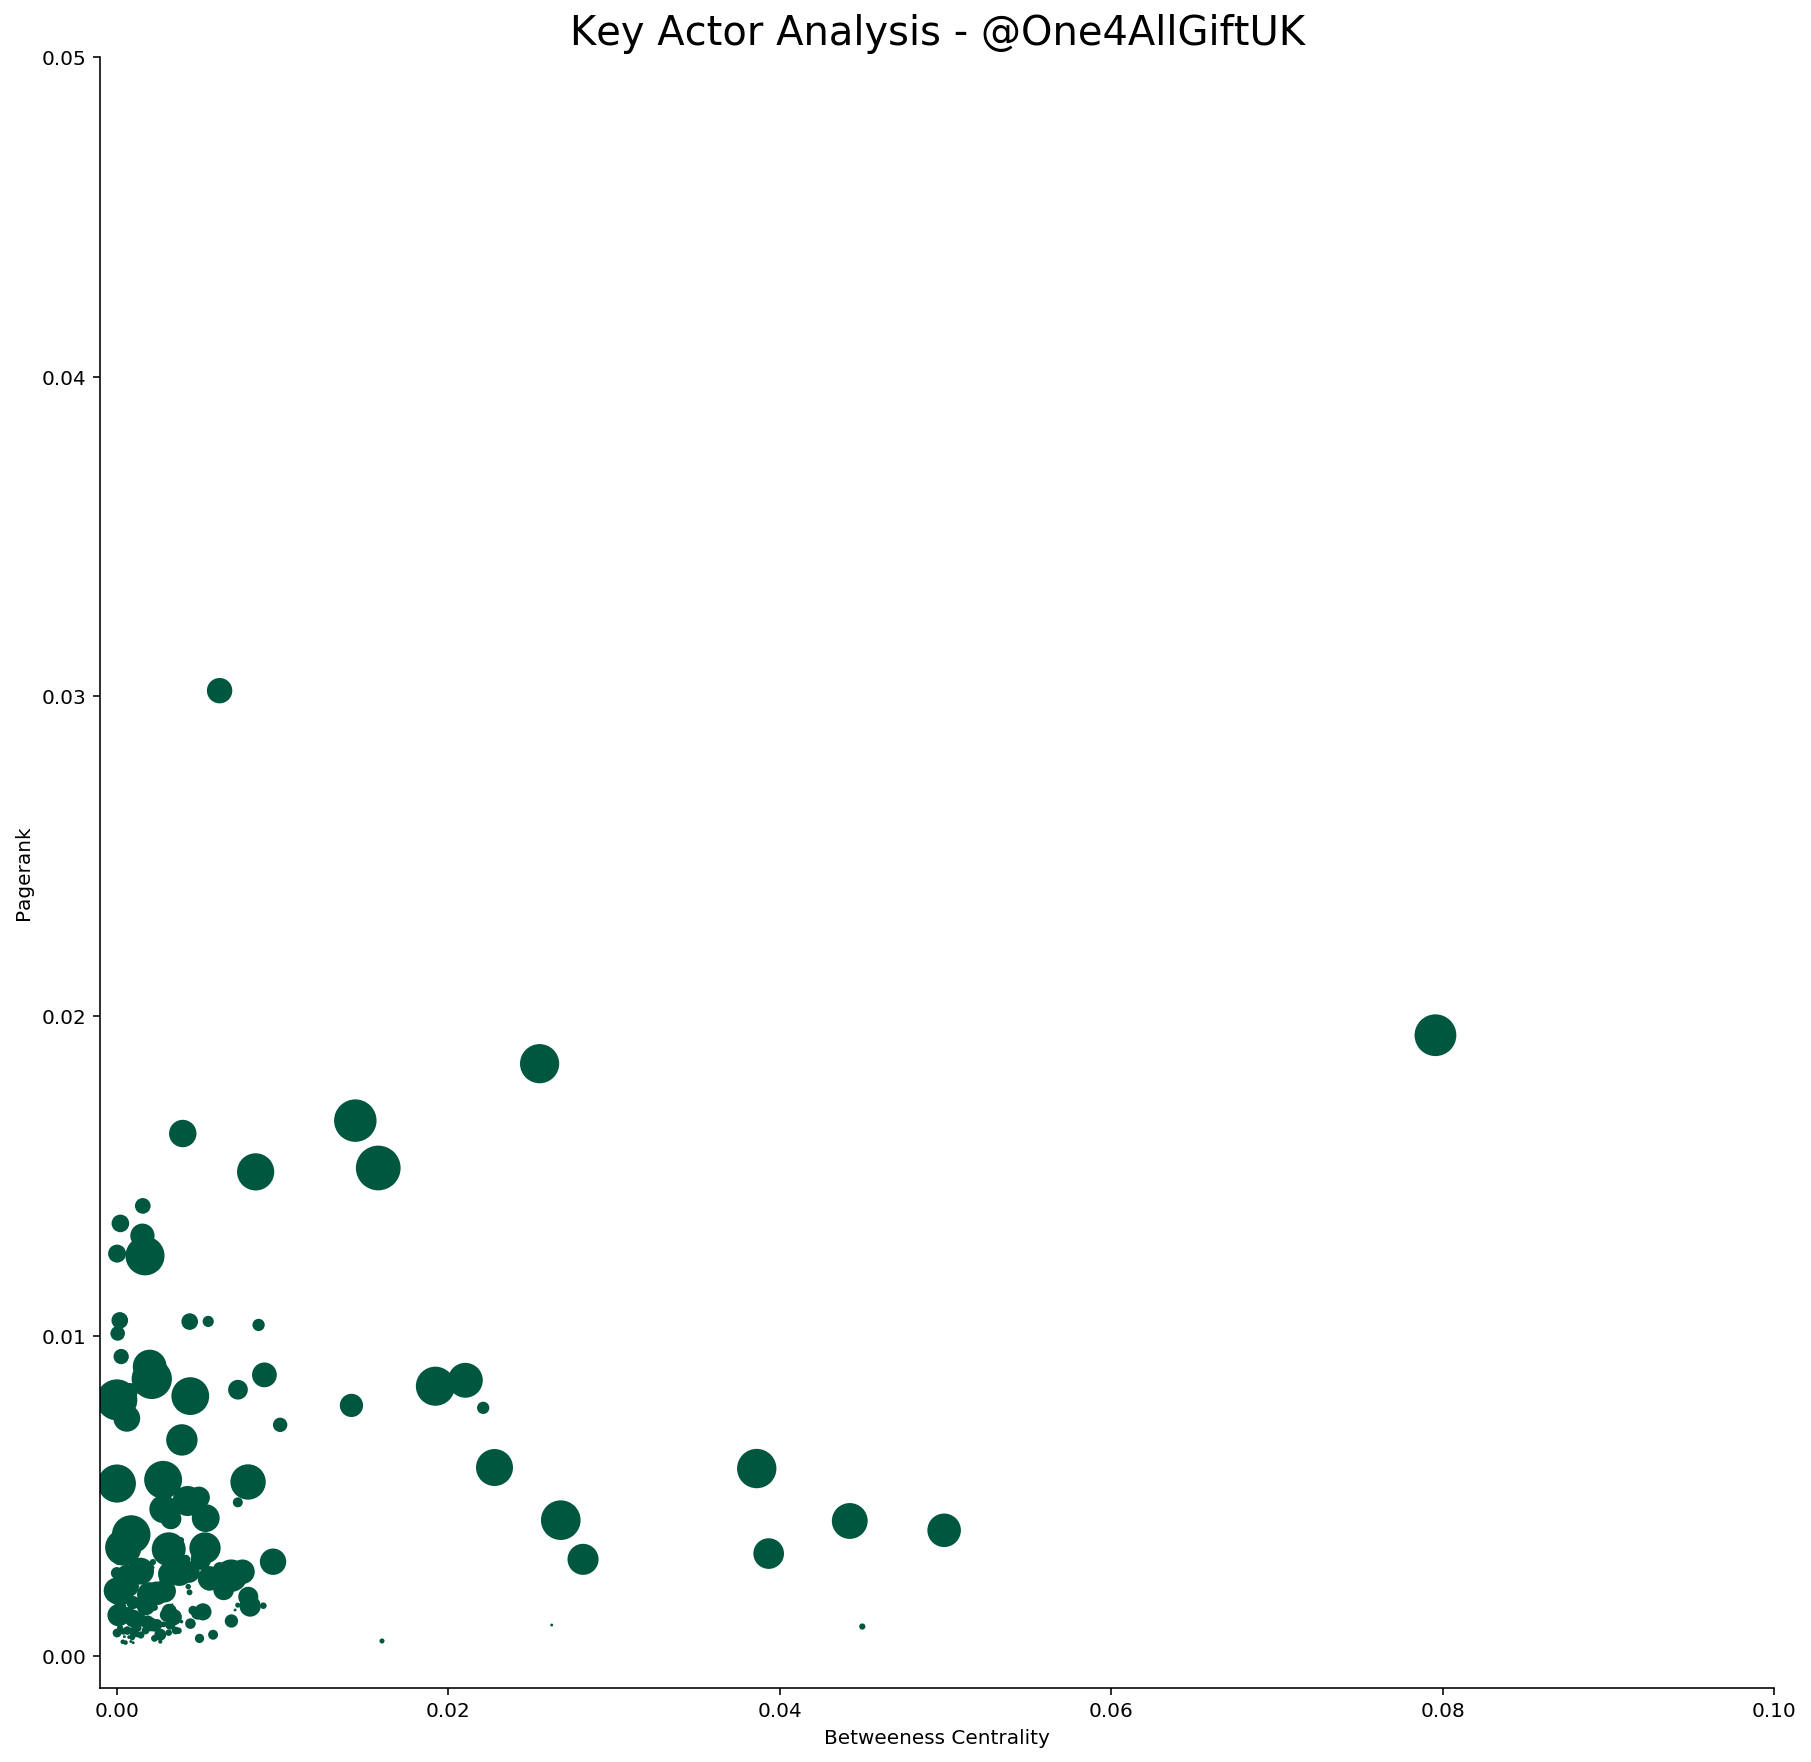

In [102]:
plot_actor_analysis(df_list[0], '@One4AllGiftUK')

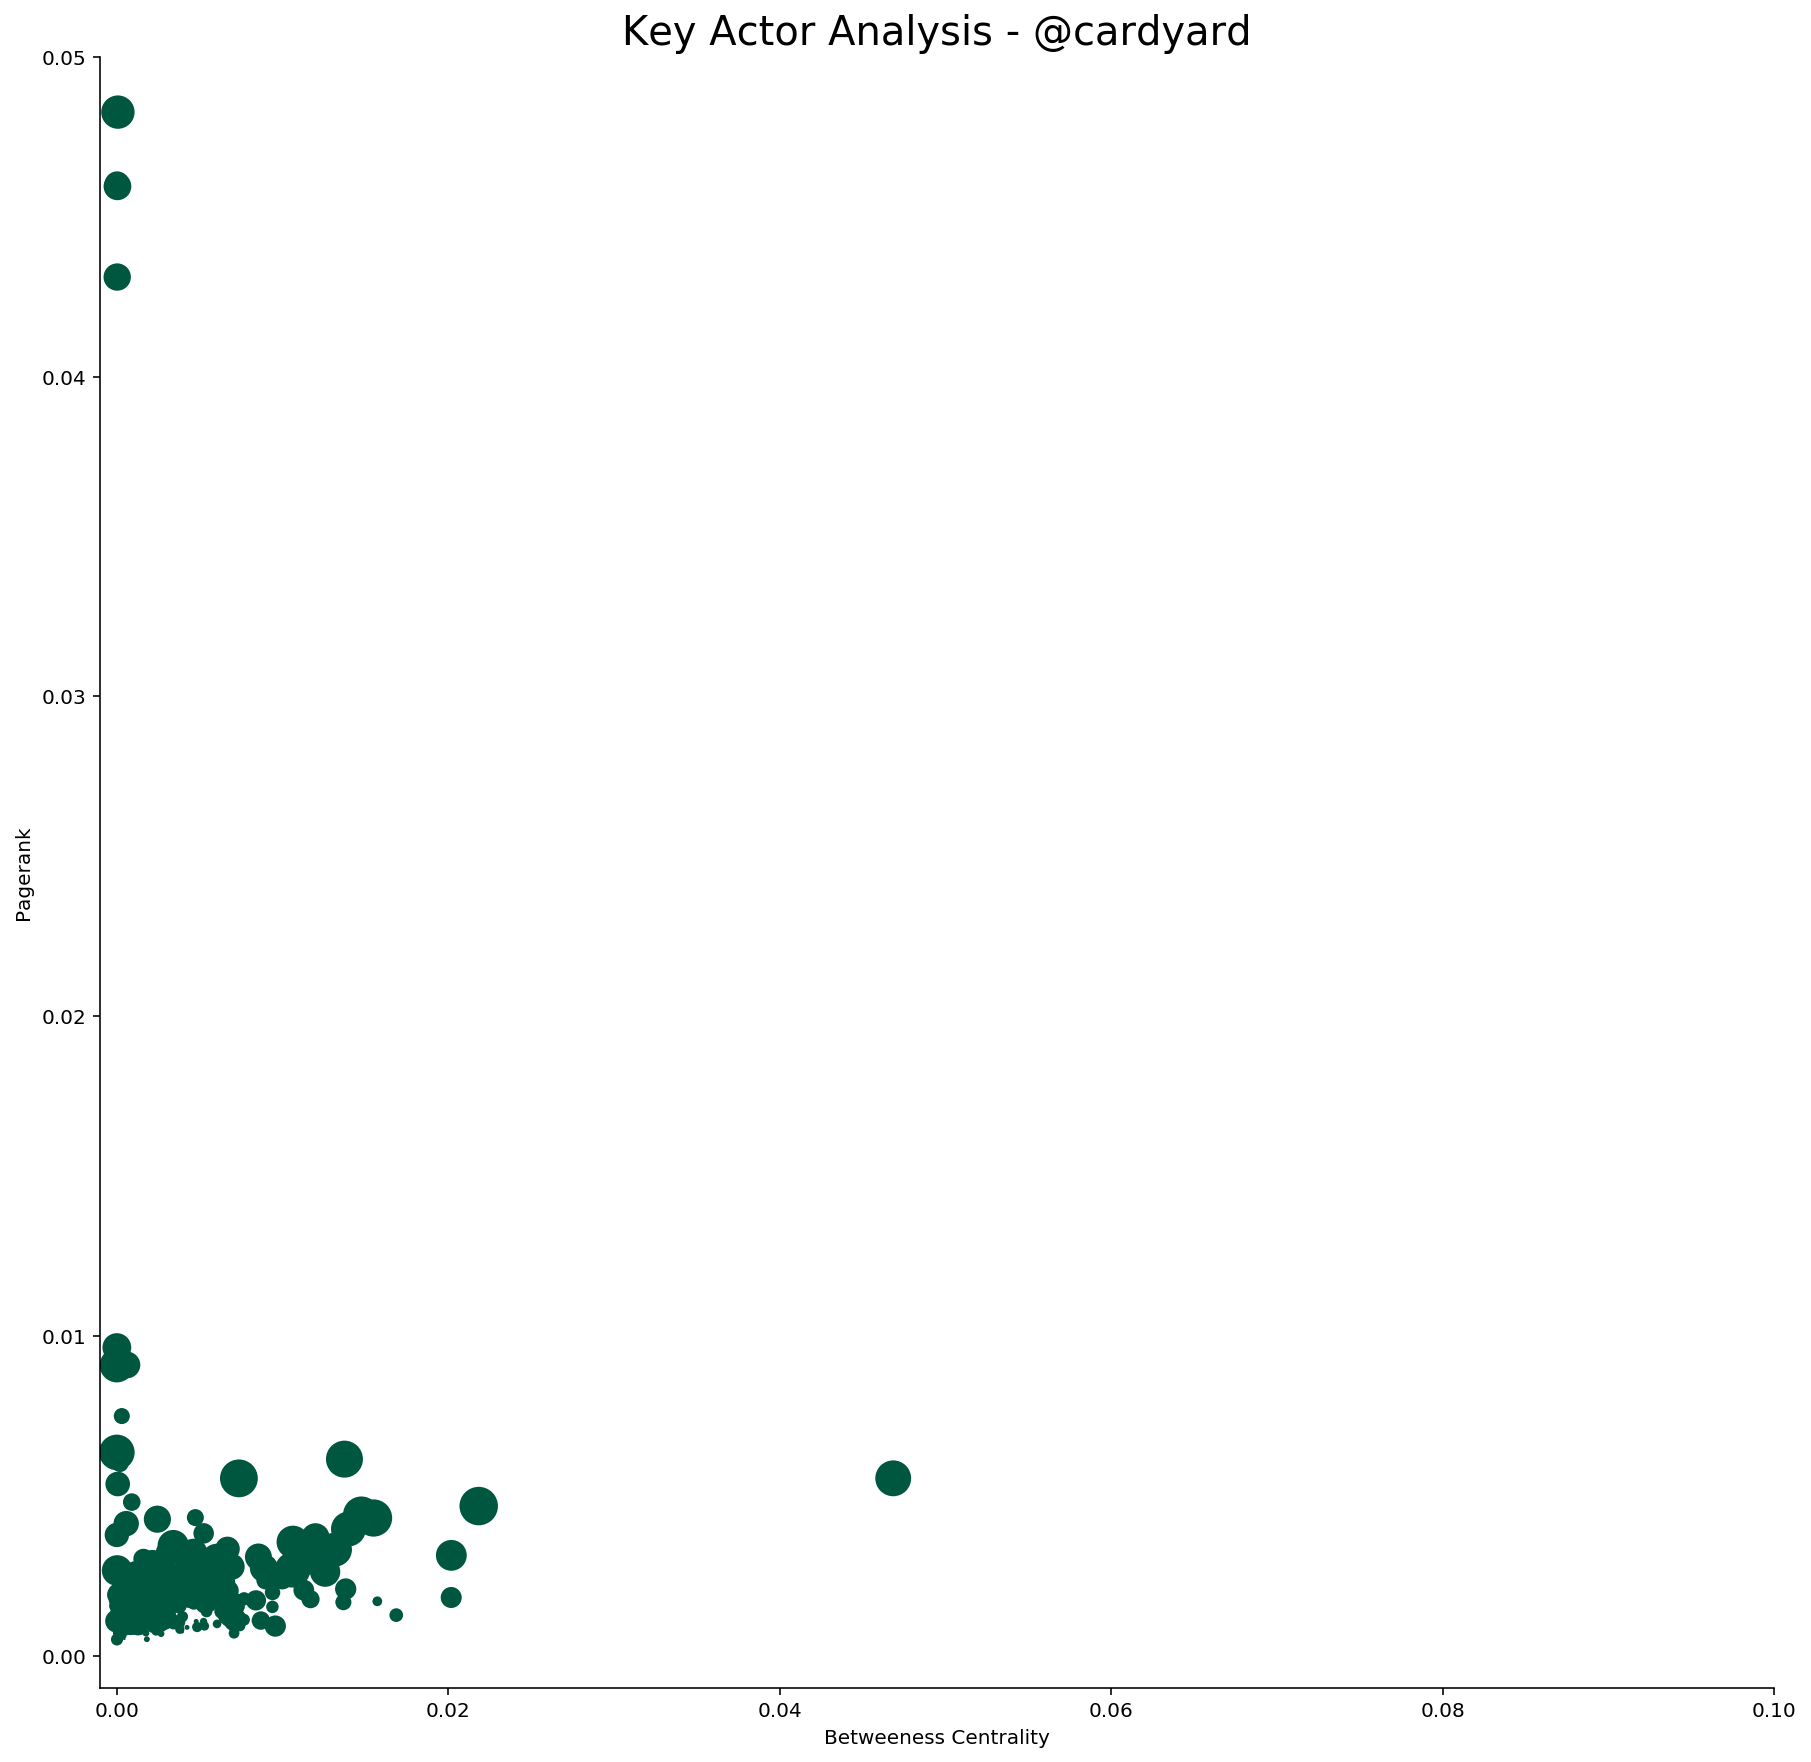

In [103]:
plot_actor_analysis(df_list[1], '@cardyard')

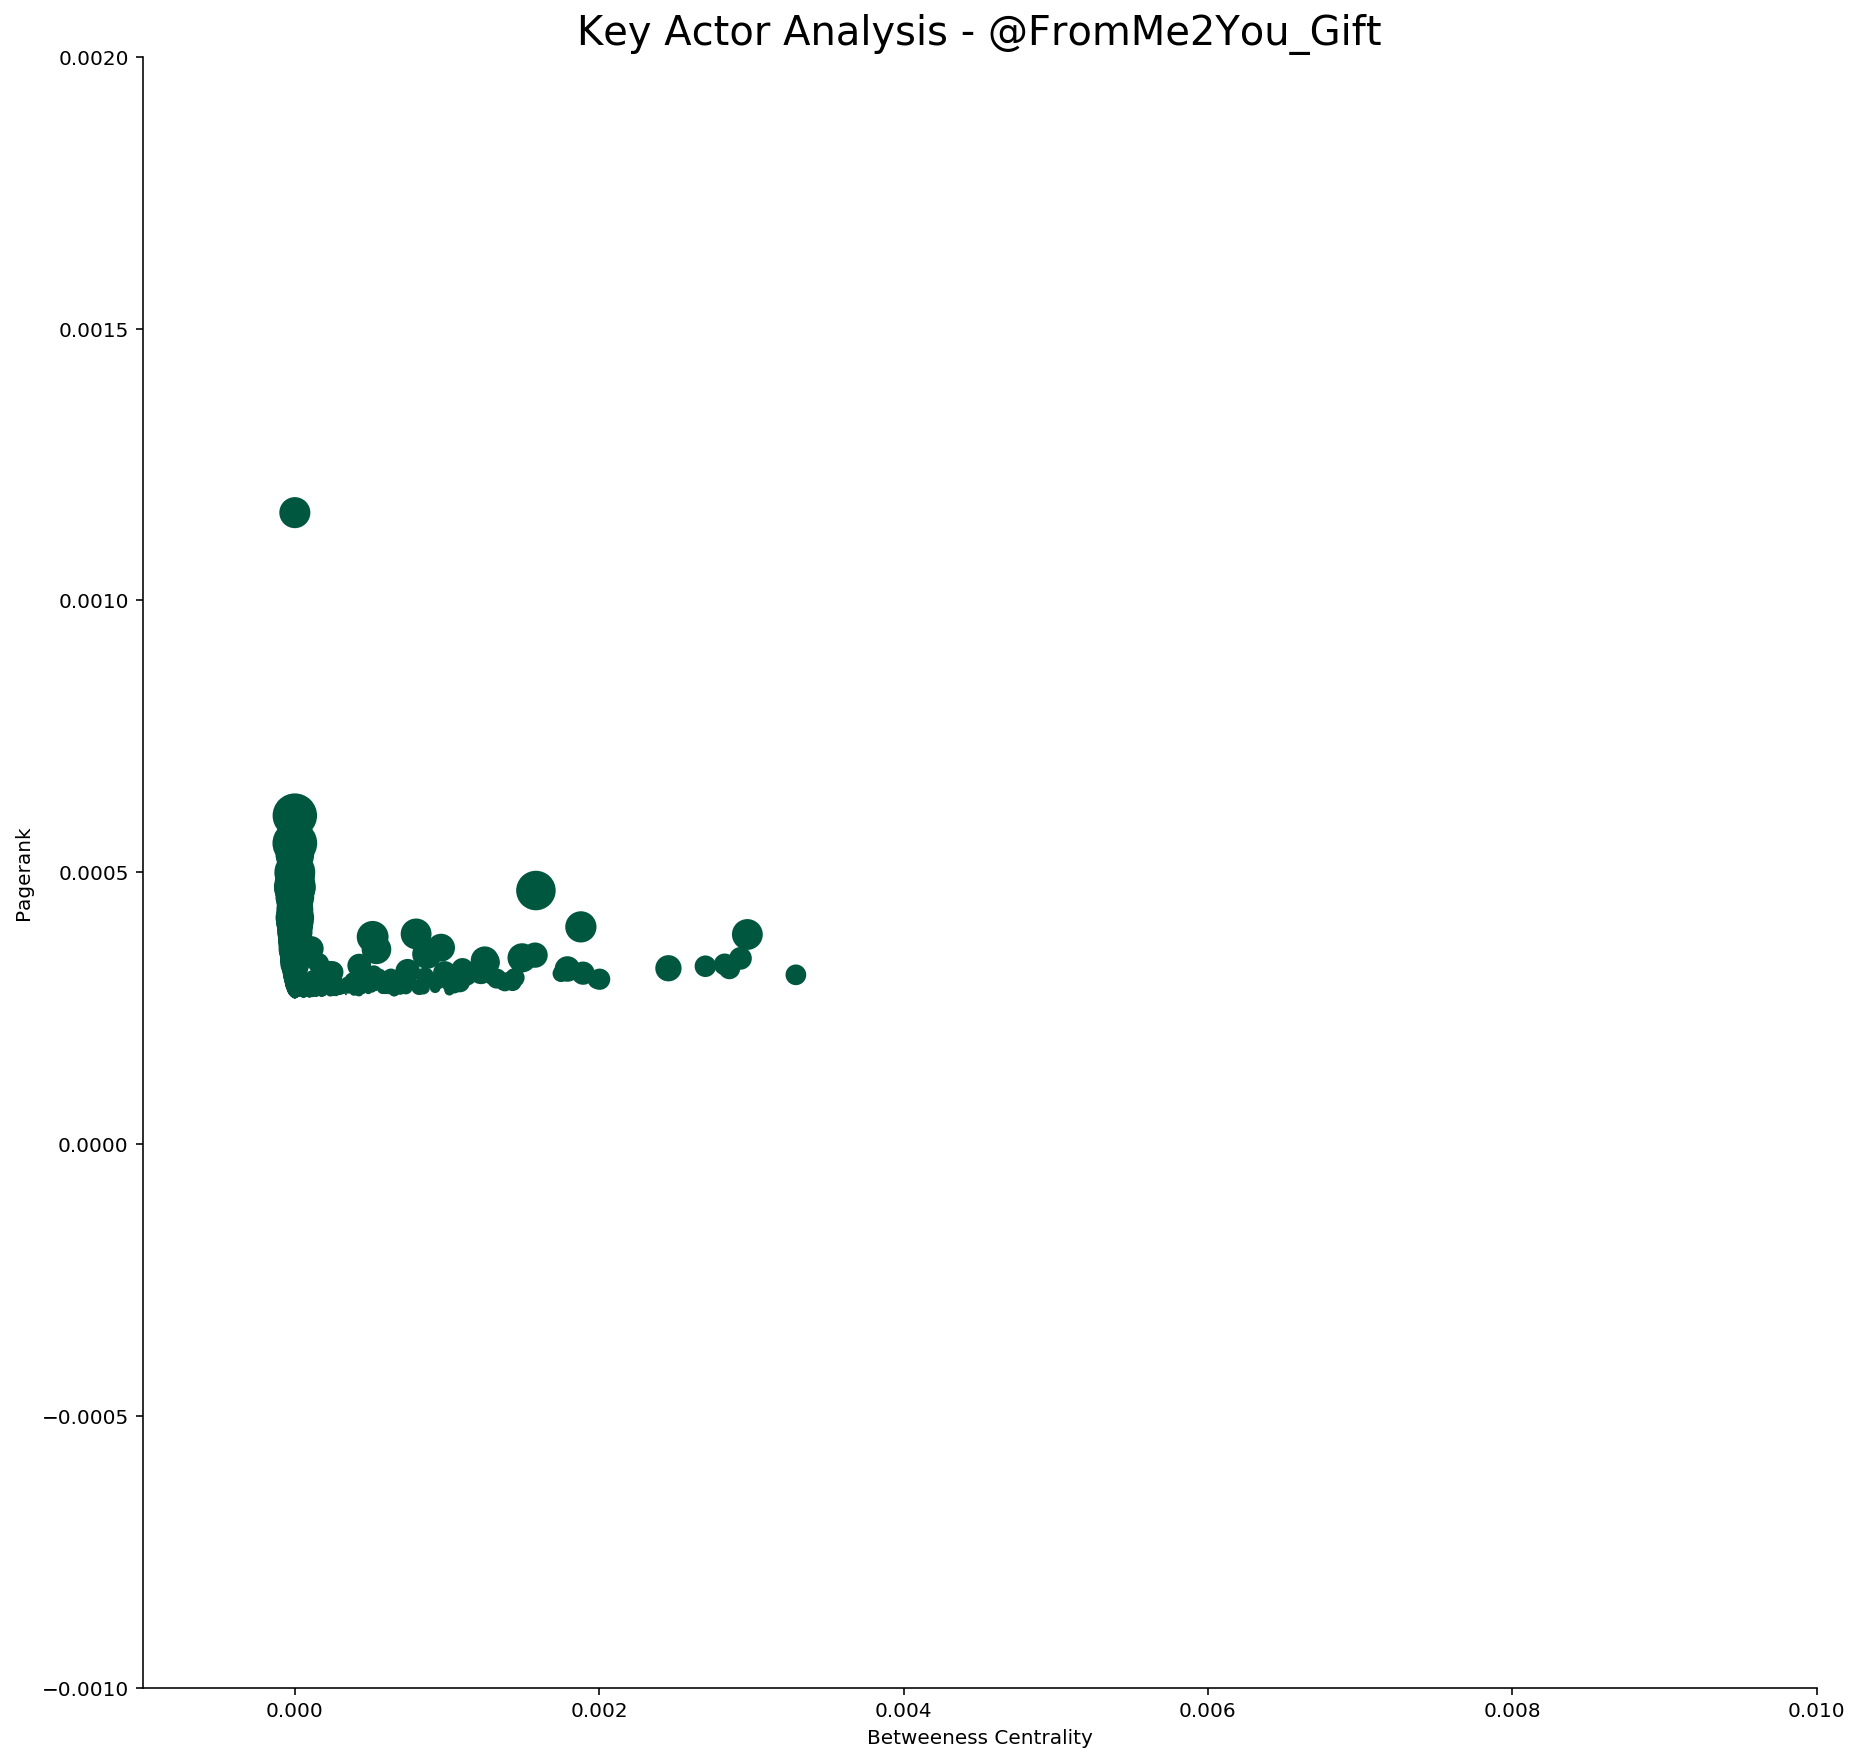

In [40]:
plot_actor_analysis(df_list[2], '@FromMe2You_Gift')

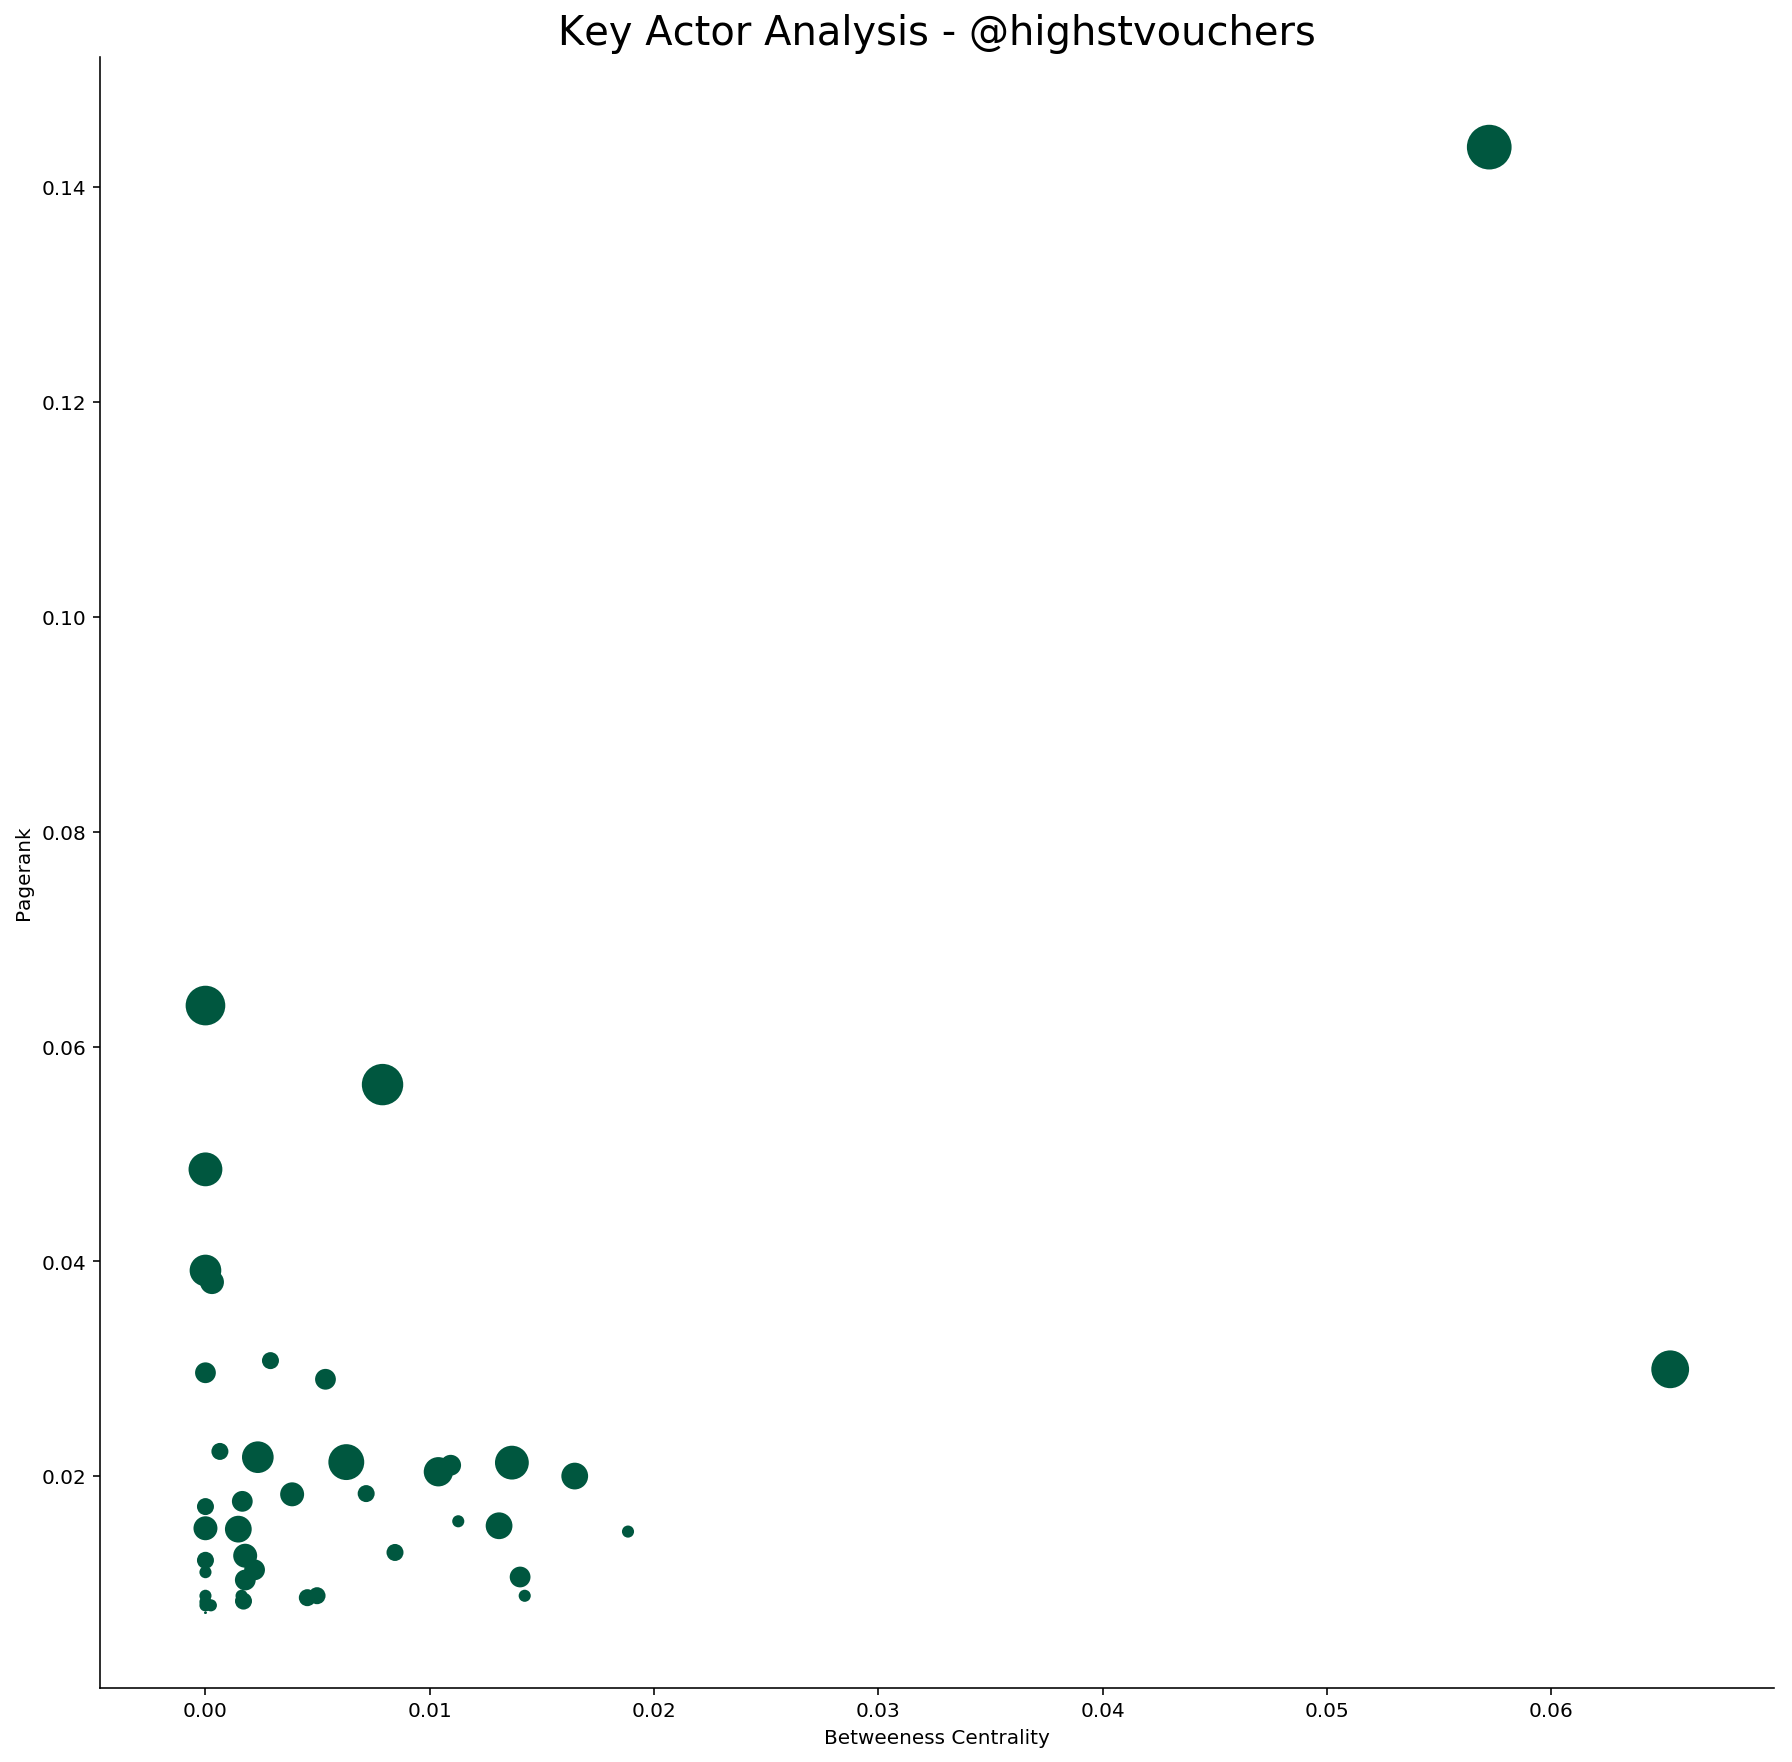

In [43]:
plot_actor_analysis(df_list[3], '@highstvouchers')

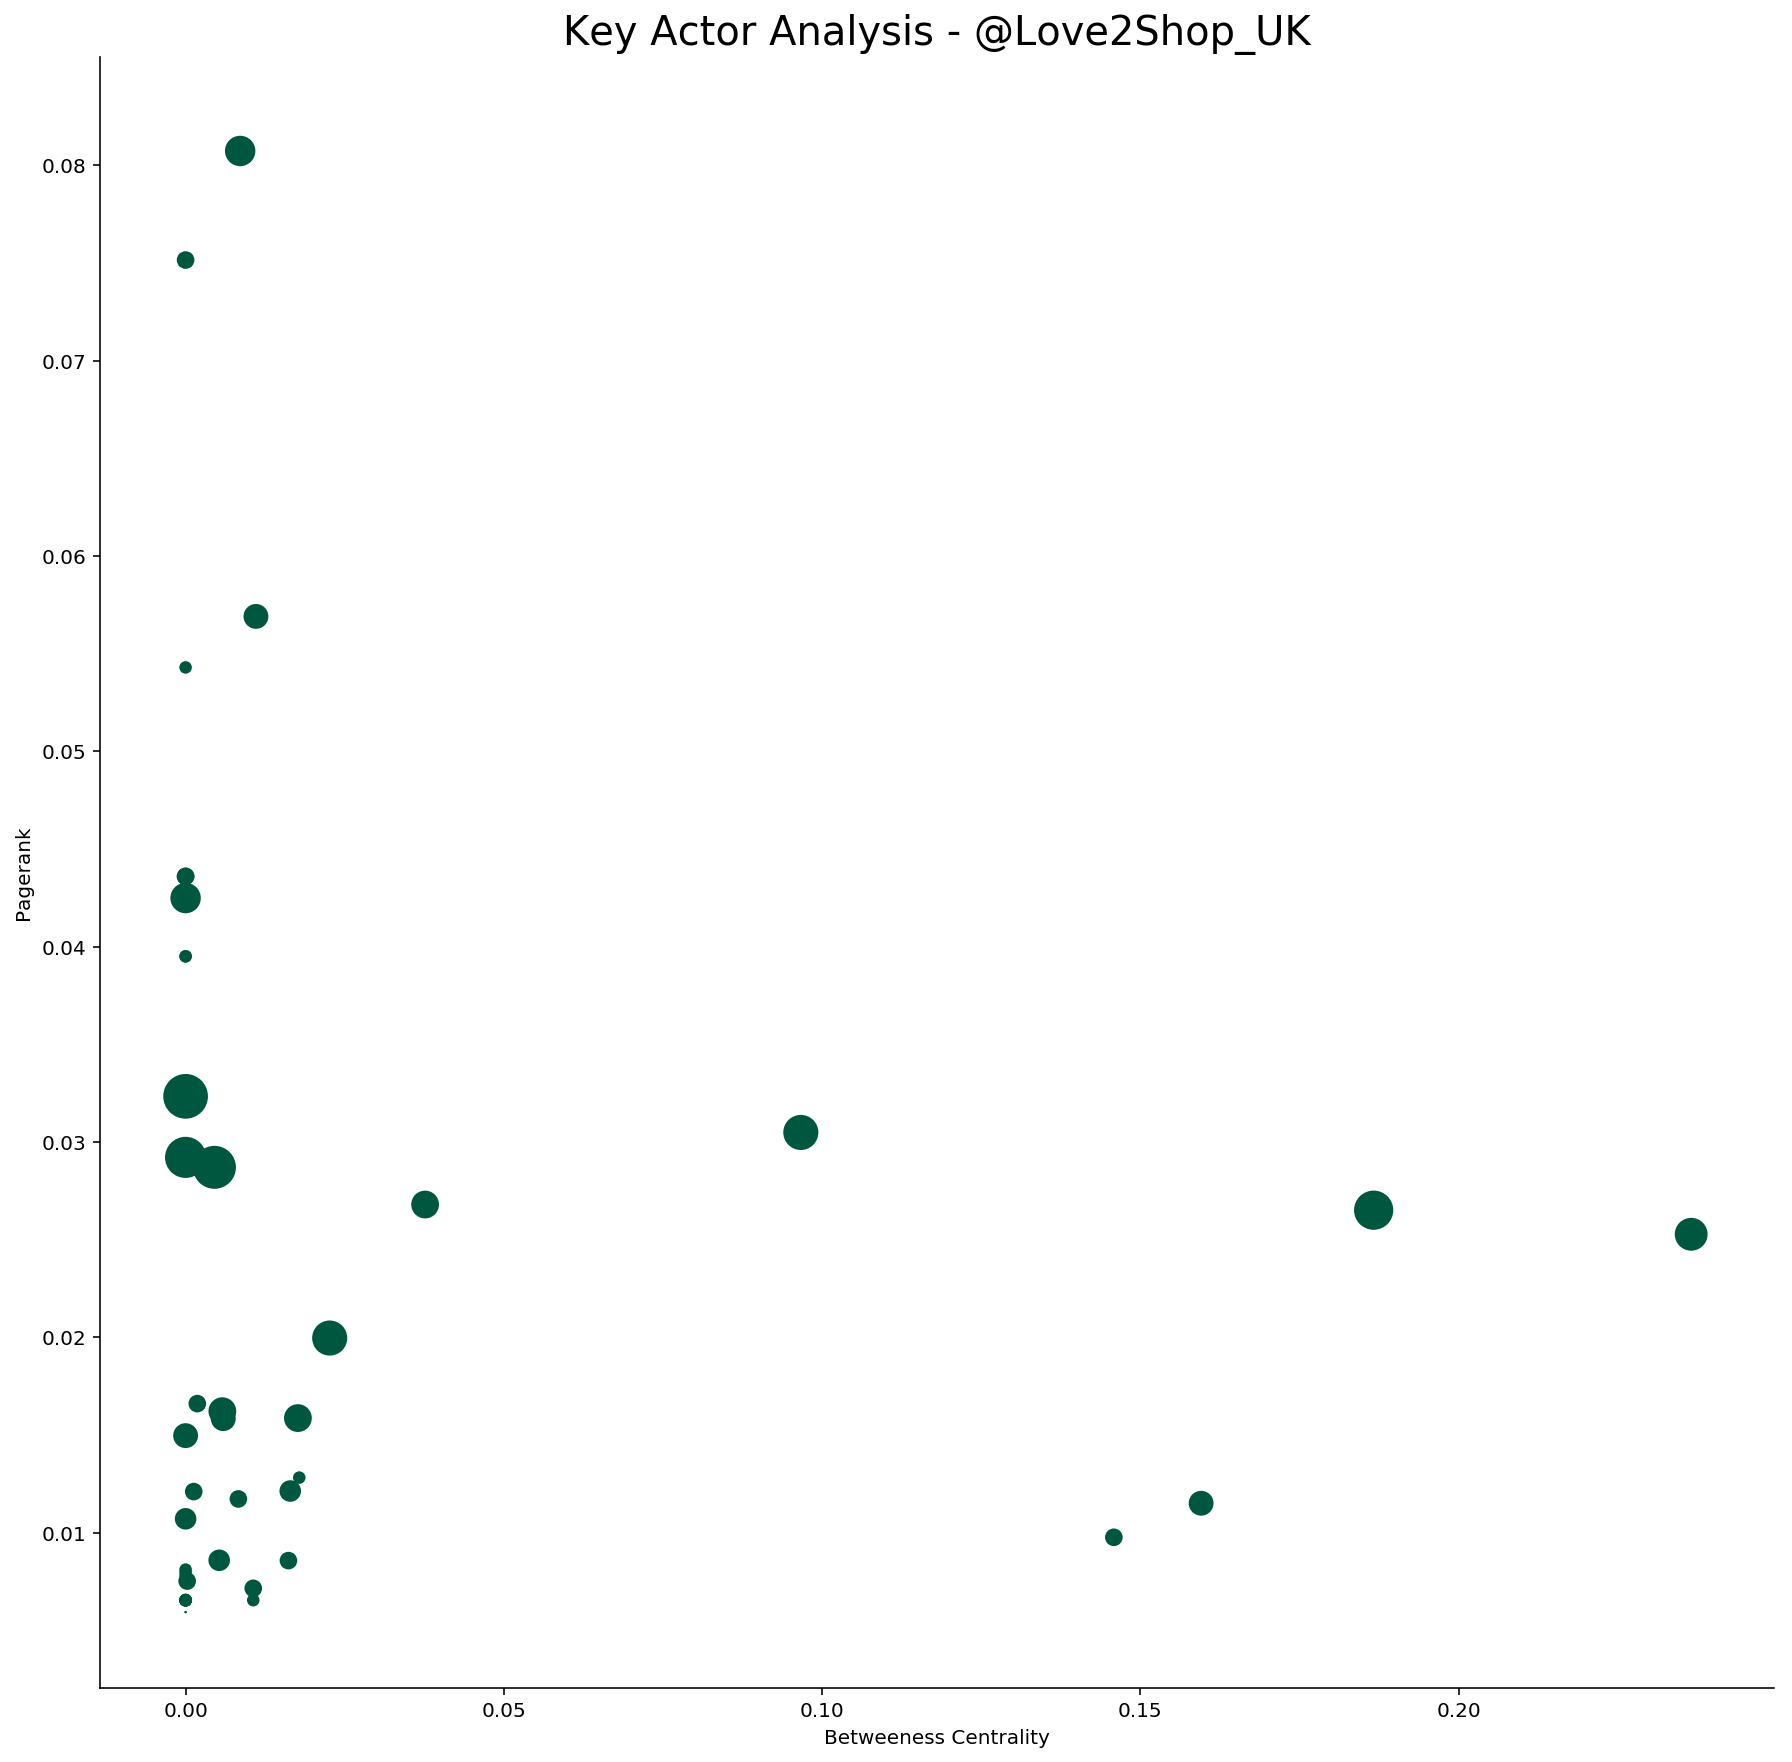

In [53]:
plot_actor_analysis(df_list[4], '@Love2Shop_UK')

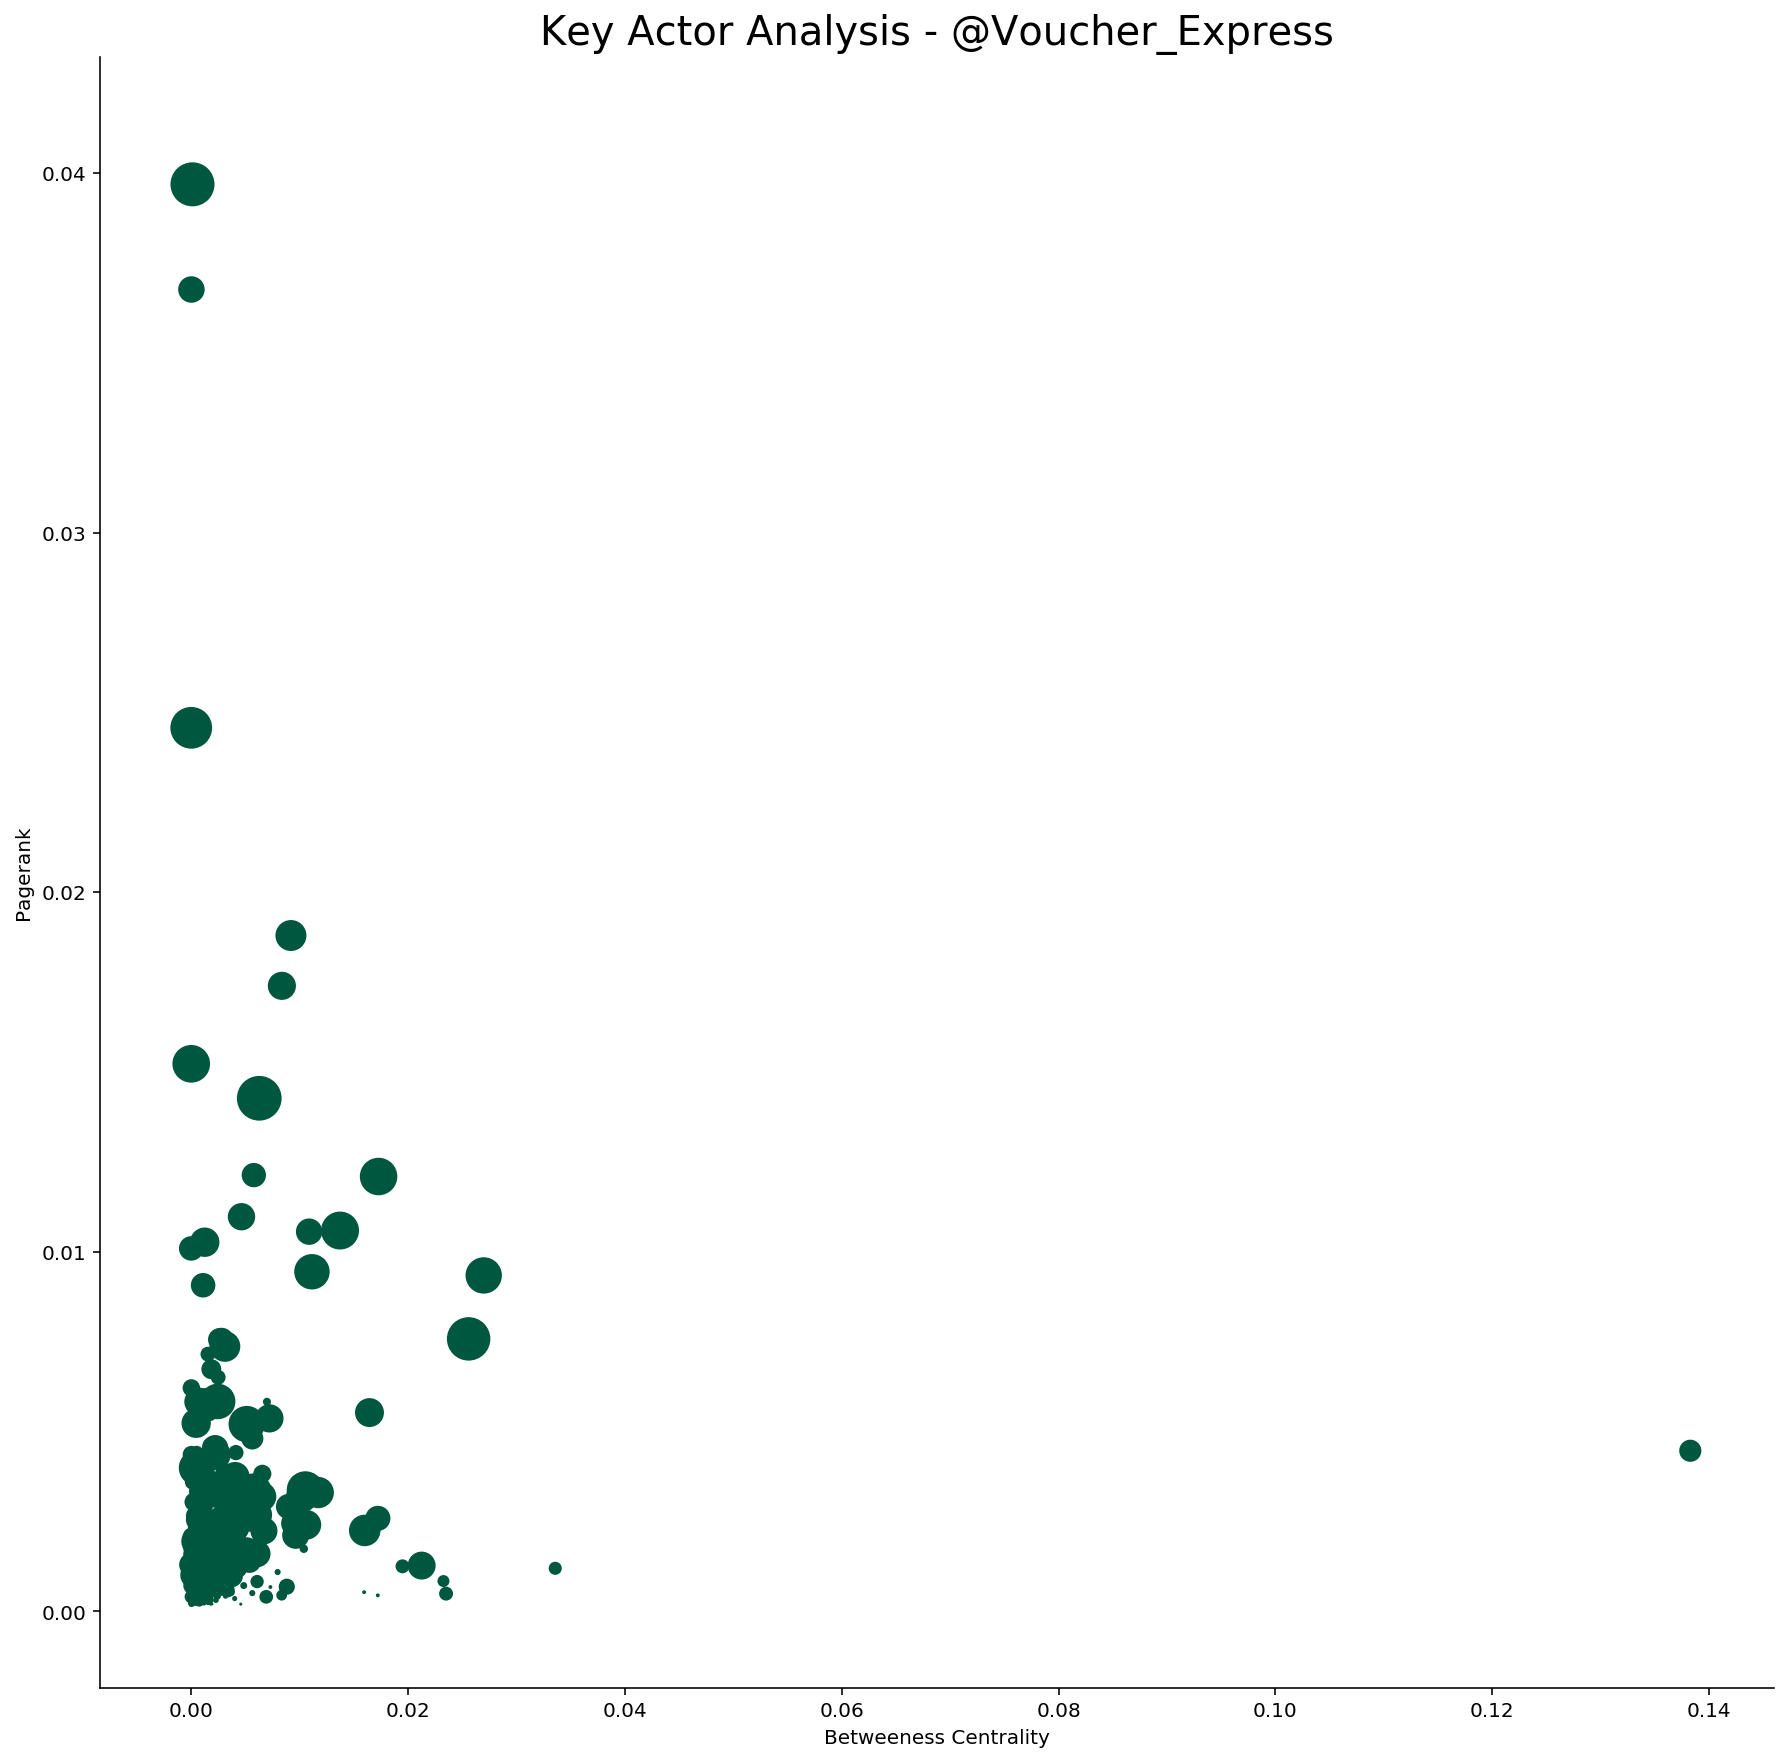

In [52]:
plot_actor_analysis(df_list[5], '@Voucher_Express')